<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/Ch14_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch14 - Notebook : Variables Aléatoires**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**



**<span style="color: #26B260">Python : ensembles ('_set_'), dictionnaires (ensemble d'objets de forme clé:valeur)</span>**

source : http://revue.sesamath.net/spip.php?article1226 , travail remarquable d'Alain BUSSER

Considérons un dé à 20 faces (icosaèdre), que l'on lance, nous allons mettre en place tous les éléments permettant d'étudier la variable aléatoire égale au nombre de diviseurs de la face obtenue.. 


In [ ]:
def nombre_diviseurs(n):
    return len([d for d in range(1,n+1) if n%d==0])

* **Univers :**

In [ ]:
U = set(range(1,21)) # Omega : ensemble des faces de dé à  20 faces
print(U)


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}


In [ ]:
{1,2,3}=={2,3,1}

True

In [ ]:
1*3 in {1,2,3}

True

* **Événements :**

In [ ]:
A = set(range(2,21,2)) # événement 'la face est paire'
print(A)

B = set(k for k in U if nombre_diviseurs(k) == 2) # événement : 'la face est un nombre premier'
print(B)

{2, 4, 6, 8, 10, 12, 14, 16, 18, 20}
{2, 3, 5, 7, 11, 13, 17, 19}


* **Intersection et Union, Complémentaire :**

In [ ]:
A_ou_B = A.union(B)
print("Événement : 'La face est un nombre pair ou premier :'", A_ou_B)

A_inter_B = A.intersection(B)
print("Événement : 'La face est un nombre pair et premier :'", A_inter_B)

A_barre = U.difference(A)
print("Événement : 'La face est un nombre impair :'",A_barre )

Événement : 'La face est un nombre pair ou premier :' {2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20}
Événement : 'La face est un nombre pair et premier :' {2}
Événement : 'La face est un nombre impair :' {1, 3, 5, 7, 9, 11, 13, 15, 17, 19}


In [ ]:
C = {1,2}
D = {1,2}
C.difference(D)

set()

* **Probabilité d'un événement :**

In [ ]:
def P(E):
    return len(E)/len(U)

In [ ]:
P(A.union(B)) == P(A)+P(B) - P(A.intersection(B)) # attention : comparaison risquée de flottants...


True

In [ ]:
print('P(A.union(B)) = ',P(A.union(B)))
print('P(A)+P(B) - P(A.intersection(B)) = ',P(A)+P(B) - P(A.intersection(B)))

P(A.union(B)) =  0.85
P(A)+P(B) - P(A.intersection(B)) =  0.85


In [ ]:
print("La probabilité d'obtenir un nombre premier est :", P(B))

La probabilité d'obtenir un nombre premier est : 0.4


* **Probabilité conditionnelle :**

In [ ]:
def proba_sachant_que(B,A):
    assert len(B)>0
    return P(A.intersection(B))/P(B)

In [ ]:
print("On obtient une face qui est un nombre premier, la probabilité qu'elle soit paire est :", proba_sachant_que(B,A))

On obtient une face qui est un nombre premier, la probabilité qu'elle soit paire est : 0.125


* **Variable aléatoire :**

On appelle X la variable aléatoire égale au nombre de diviseurs de la face obtenue.

In [ ]:
X = { n : nombre_diviseurs(n) for n in U } 
# X(Oméga) : univers sous forme de dictionnaire : la clé est le numero de la face,  
# la valeur, son nombre de diviseurs
print(X)

{1: 1, 2: 2, 3: 2, 4: 3, 5: 2, 6: 4, 7: 2, 8: 4, 9: 3, 10: 4, 11: 2, 12: 6, 13: 2, 14: 4, 15: 4, 16: 5, 17: 2, 18: 6, 19: 2, 20: 6}


In [ ]:
X.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [ ]:
X.values()

dict_values([1, 2, 2, 3, 2, 4, 2, 4, 3, 4, 2, 6, 2, 4, 4, 5, 2, 6, 2, 6])

* **Loi de la variable aléatoire X :**

(c'est à dire X($\Omega$), puis pour chacun d'eux, on associe sa probabilité)

On définit d'abord les événements [X=k]

In [ ]:
def egal(X,k):
    return {x for x in X.keys() if X[x]==k}

def loi(X):
    return {k : P(egal(X,k)) for k in X.values()}



In [ ]:
loi_X = loi(X)
print(loi_X)

X_Omega = list(loi_X.keys())
#X_Omega[:] = sorted(X_Omega)
print('X(Omega) =', X_Omega)

probabilites = list(loi_X.values())
print('Probabilités respectives :',probabilites)

{1: 0.05, 2: 0.4, 3: 0.1, 4: 0.25, 6: 0.15, 5: 0.05}
X(Omega) = [1, 2, 3, 4, 6, 5]
Probabilités respectives : [0.05, 0.4, 0.1, 0.25, 0.15, 0.05]


* **Représentation graphique**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(X.values())

dict_values([1, 2, 2, 3, 2, 4, 2, 4, 3, 4, 2, 6, 2, 4, 4, 5, 2, 6, 2, 6])


Text(0, 0.5, 'probabilites')

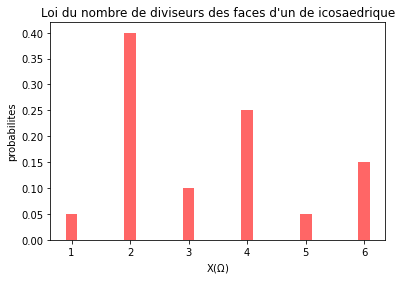

In [ ]:

plt.bar(X_Omega,probabilites, width = 0.2, color = 'red', alpha = 0.6)
plt.title("Loi du nombre de diviseurs des faces d'un de icosaedrique")
plt.xlabel('X($\Omega$)')
plt.ylabel('probabilites')

* **Fonction de répartition**

In [ ]:
def au_plus(X,k):
    return {x for x in X.keys() if X[x]<=k}

def fRep(X):
    return {k:P(au_plus(X,k)) for k in X.values()}

print(fRep(X))

{1: 0.05, 2: 0.45, 3: 0.55, 4: 0.8, 6: 1.0, 5: 0.85}


* **Éléments caractériques :**

  * **Espérance :**
  * **Variance :**
  * **Écart-type :**

In [ ]:
def E(X):
    return sum({k*P(egal(X,k)) for k in X.values()})

def V(X):
    X2 = { k:X[k]**2 for k in X.keys() }
    return E(X2)-E(X)**2 # formule de Koenig-Huygens

def sigma(X):
    from math import sqrt
    return sqrt(V(X))

In [ ]:
print('Espérance de X :',E(X))
print('Variance de X :', V(X))
print('Écart-type de X :',sigma(X))

Espérance de X : 3.3000000000000003
Variance de X : 2.309999999999997
Écart-type de X : 1.5198684153570654


  * **Quartiles**
  
  Note : On définira la médiane comme le 2<sup>ème</sup> quartile, valeur de la série à partir de laquelle l'effectif dépasse 50% de la population, ce qui n'est pas la définition enseignée en lycée en France
  
  * **Intervalle inter-quartiles**  
  
  * **Deciles**
  
  Reprenons la fonction de répartition obtenue ci-dessus et classons les valeurs.
  Les calculs se font par interpolation linéaire entre les points charnières (Théorème de Thalès)

In [ ]:
F = fRep(X)
FF = sorted(F.items(), key=lambda t: t[0])
print(FF)

[(1, 0.05), (2, 0.45), (3, 0.55), (4, 0.8), (5, 0.85), (6, 1.0)]


In [ ]:
k = 0
while FF[k][1] < 0.5 :
    k = k+1

mediane = FF[k-1][0]+(0.5 - FF[k-1][1])/(FF[k][1] - FF[k-1][1])*(FF[k][0]-FF[k-1][0])
print('Médiane de la série :',mediane)

Médiane de la série : 2.4999999999999996


In [ ]:
# Quartiles :
quartiles = [0]*3
for d in range(1,4):
    k = 0
    while FF[k][1] < d/4 :
        k = k+1

    quartiles[d-1] = FF[k-1][0]+(d/4 - FF[k-1][1])/(FF[k][1] - FF[k-1][1])*(FF[k][0]-FF[k-1][0])
    print('Q',d,'=',quartiles[d-1])


Q 1 = 1.5
Q 2 = 2.4999999999999996
Q 3 = 3.8


In [ ]:
# Intervalle inter-quartiles
print("50% de la série se situe dans l'intervalle [", quartiles[0],';',quartiles[2],'].')

50% de la série se situe dans l'intervalle [ 1.5 ; 3.8 ].


In [ ]:
# Déciles :
for d in range(1,10):
    k = 0
    while FF[k][1] < d/10 :
        k = k+1

    decile = FF[k-1][0]+(d/10 - FF[k-1][1])/(FF[k][1] - FF[k-1][1])*(FF[k][0]-FF[k-1][0])
    print('D',d,'=',decile)


D 1 = 1.125
D 2 = 1.375
D 3 = 1.625
D 4 = 1.875
D 5 = 2.4999999999999996
D 6 = 3.1999999999999997
D 7 = 3.5999999999999996
D 8 = 4.0
D 9 = 5.333333333333334
